In [7]:
import importlib.machinery
import numpy as np

pyfor = importlib.machinery.SourceFileLoader('pyfor','/home/bryce/Programming/PyFor/pyfor/__init__.py').load_module()

In [8]:
# Load a sample point cloud and retrieve a 0.5 resolution grid

a = pyfor.cloud.Cloud("/home/bryce/Desktop/pyfor_test_data/PC_001.las")
a_grid = a.grid(0.5)

(999, 857)

In [73]:
A = A[1:20, 1:20]

array([[ 600.01,  600.01,  600.01,  600.01,  600.01,  600.01,  600.01,
         600.01,  600.01,  600.01,  600.01,  600.01,  600.01,  600.01,
         600.01,  600.01,  600.01],
       [ 602.42,  602.42,  602.42,  602.42,  602.42,  602.42,  602.42,
         602.42,  602.42,  602.42,  602.42,  602.42,  602.42,  602.42,
         602.42,  602.42,  602.42],
       [ 623.69,  623.69,  623.69,  623.69,  623.69,  623.69,  623.69,
         623.69,  623.69,  623.69,  623.69,  623.69,  623.69,  623.69,
         623.69,  623.69,  623.69],
       [ 612.93,  612.93,  612.93,  612.93,  612.93,  612.93,  612.93,
         612.93,  612.93,  612.93,  612.93,  612.93,  612.93,  612.93,
         612.93,  612.93,  612.93],
       [ 630.41,  630.41,  630.41,  630.41,  630.41,  630.41,  630.41,
         630.41,  630.41,  630.41,  630.41,  630.41,  630.41,  630.41,
         630.41,  630.41,  630.41],
       [ 590.21,  590.21,  590.21,  590.21,  590.21,  590.21,  590.21,
         590.21,  590.21,  590.21,  590

In [55]:
flag = np.zeros((m, n))
flag.shape

(19, 19)

Determine series of $w_k$ using (4) or (5) where $w_k$ <= maximum window size

(4): $w_k = 2kb + 1$

(5): $w_k = 2b^k + 1$

I'll elect to try (4) first, authors suggest it is computationally easier later on.

In [44]:
max_window_size = 4

def w_k(k, b = 2):
    return(2 * k * b + 1)
  
def dht(elev_array, w_k, w_k_1):
    s = slope(elev_array, w_k, w_k_1)
    if w_k <= 3:
        return(dh0)
    elif w_k > 3:
        return(s*(w_k - w_k_1)*c + dh0)
    else:
        return(dhmax)

def dhmax(elev_array):
    return(np.max(elev_array) - np.min(elev_array))

    
def slope(elev_array, w_k, w_k_1):
    s = dhmax(elev_array) / ((w_k - w_k_1) / 2)
    return(s)

    
w_k_list = list(map(w_k, range(1, max_window_size+1)))

In [48]:
# Set parameters
c = a_grid.cell_size
b = 2
d_hmax = 2.5
m = A.shape[0]
n= A.shape[1]
dh0 = 3

In [22]:
test_z = A[1,:]

def erosion(Z, w_k):
    Z_f = []
    for j in range(1, n+1):
        # Construct vector of l indices
        lb = np.floor(j - (w_k / 2))
        ub = np.ceil(j + (w_k / 2))
        
        a = [Z[l] for l in range(int(lb), int(ub)) if l >=0 and l <= len(Z)-1]
        Z_f.append(np.min(a))
    return(Z_f)
    
def dilation(Z, w_k):
    Z_f = []
    for j in range(1, n+1):
        # Construct vector of l indices
        lb = np.floor(j - (w_k / 2))
        ub = np.ceil(j + (w_k / 2))
        
        a = [Z[l] for l in range(int(lb), int(ub)) if l >=0 and l <= len(Z)-1]
        Z_f.append(np.max(a))
    return(Z_f)

In [68]:
w_k_min = min(w_k_list)

for w_k in enumerate(list([w_k_list[0]])):
    if w_k[1] == w_k_min:
        w_k_1 = 0
    else:
        w_k_1 = w_k_list[w_k[0] - 1]
    for i in range(0, m):
        P_i = A[i,:]
        Z = P_i
        Z_f = erosion(Z, w_k[1])
        Z_f = dilation(Z_f, w_k[1])
        P_i = Z_f
        A[i,:] = P_i
        dh_t = dht(Z, w_k[1], w_k_1)
        for j in range(0, n):
            print(Z[j])
            if Z[j] - Z_f[j] > dht(Z, w_k[1], w_k_1):
                flag[i,j] = w_k
    dh_t = dht(Z, w_k[1], w_k_1)

#for i in range(i, m):
#    for j in range(i, n):
#        # Make sure actual coordinates are retrievable :(
#        if B[i,j] and B[i,j] > 0:
#            pass
            
        

608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
608.13
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
603.18
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
600.01
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
602.42
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
623.69
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
612.93
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
630.41
590.21
590.21
590.21
590.21
590.21
590.21
590.21
590.21
590.21
590.21

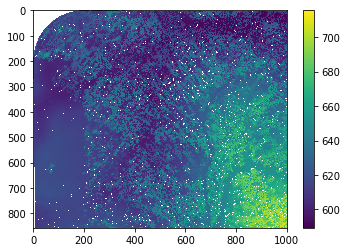

In [93]:
import matplotlib.pyplot as plt
import pyfor

A = pyfor.cloud.Cloud("sample.las")
A = a_grid.array("min", "z")
A = a_grid.interpolate("z", "min")

plt.imshow(A);
plt.colorbar()
plt.show()